In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import random
from scipy.interpolate import lagrange
from scipy.interpolate import interp1d

def filter_extreme_values(data, column_name):
    # Exclude bottom and top 2.5% to use the top 95% of relevant data 
    lower_bound = data[column_name].quantile(0.025)
    upper_bound = data[column_name].quantile(0.975)
    
    filtered_data = data[(data[column_name] > 1) & 
                         (data[column_name] >= lower_bound) & 
                         (data[column_name] <= upper_bound)].copy() 
    
    return filtered_data
# loading dataset
training_data = pd.read_csv("cook_county_train.csv", index_col='Unnamed: 0')


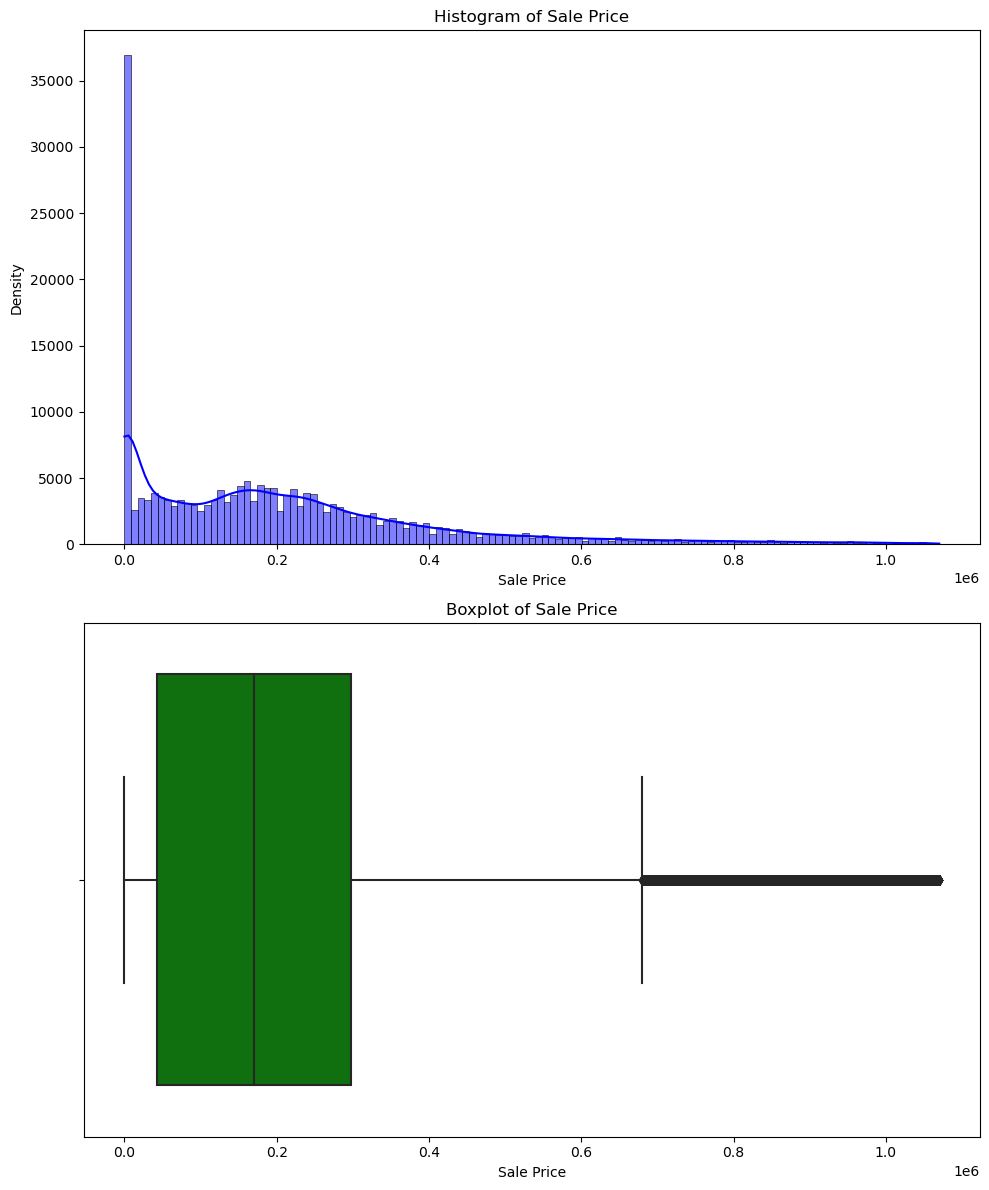

In [2]:
#note: This is the graph for when 0's are included, in other words, un-normalized
#this filter is only used for this graph
def filter_extreme_unused(data, column_name):
    # Calculate the 2.5th and 97.5th percentiles of the specified column
    lower_bound = data[column_name].quantile(0.025)
    upper_bound = data[column_name].quantile(0.975)
    
    filtered_data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    
    return filtered_data

def plot_filtered_data(data, column_name):

    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

    # Histogram
    sns.histplot(data[column_name], kde=True, ax=axs[0], color='blue')
    axs[0].set_title('Histogram of ' + column_name)
    axs[0].set_xlabel(column_name)
    axs[0].set_ylabel('Density')

    # Boxplot
    sns.boxplot(x=data[column_name], ax=axs[1], color='green')
    axs[1].set_title('Boxplot of ' + column_name)

    plt.tight_layout()
    plt.show()


filtered_training_data = filter_extreme_unused(training_data, 'Sale Price')

plot_filtered_data(filtered_training_data, 'Sale Price')

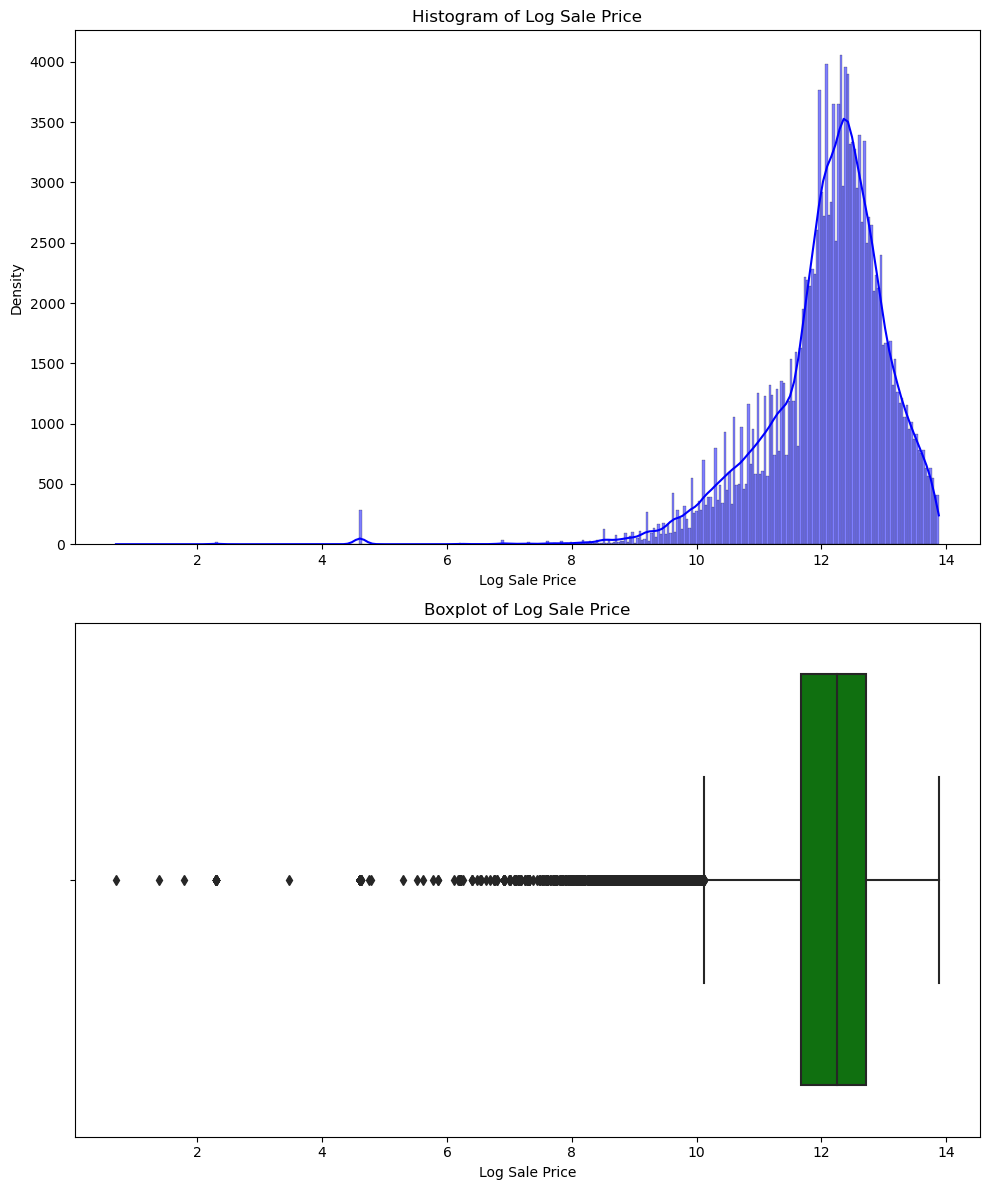

In [3]:
#Log sale price, removing any 0's 
def plot_filtered_data(data, column_name):
    data['Log ' + column_name] = np.log(data[column_name])
    
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

    # Histogram
    sns.histplot(data['Log ' + column_name], kde=True, ax=axs[0], color='blue')
    axs[0].set_title('Histogram of Log ' + column_name)
    axs[0].set_xlabel('Log ' + column_name)
    axs[0].set_ylabel('Density')

    # Boxplot
    sns.boxplot(x=data['Log ' + column_name], ax=axs[1], color='green')
    axs[1].set_title('Boxplot of Log ' + column_name)

    plt.tight_layout()
    plt.show()

filtered_training_data = filter_extreme_values(training_data, 'Sale Price')

plot_filtered_data(filtered_training_data, 'Sale Price')


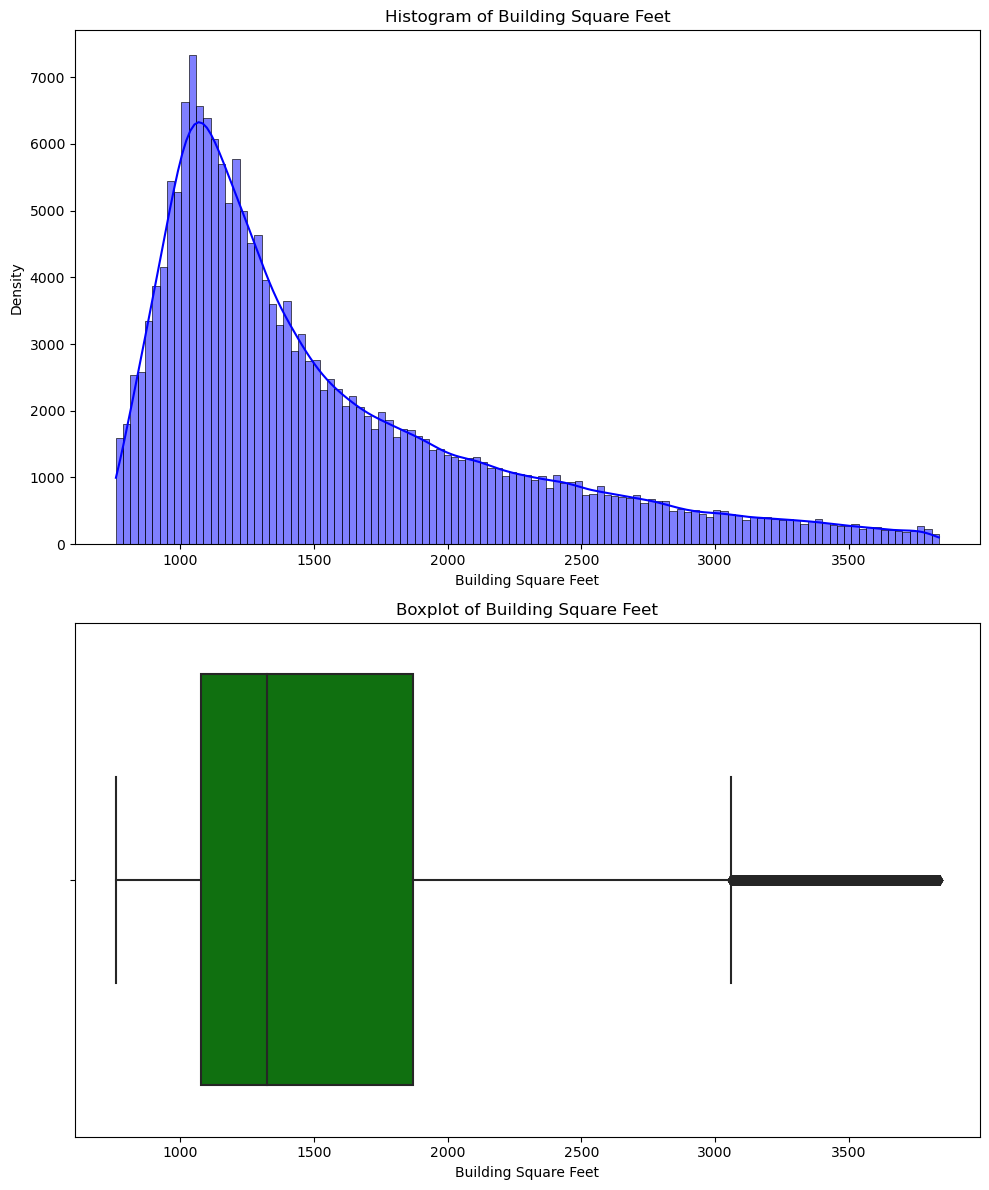

In [4]:
#building square feet code
def plot_filtered_data(data, column_name):
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

    sns.histplot(data[column_name], kde=True, ax=axs[0], color='blue')
    axs[0].set_title('Histogram of ' + column_name)
    axs[0].set_xlabel(column_name)
    axs[0].set_ylabel('Density')

    sns.boxplot(x=data[column_name], ax=axs[1], color='green')
    axs[1].set_title('Boxplot of ' + column_name)

    plt.tight_layout()
    plt.show()

training_data = pd.read_csv("cook_county_train.csv", index_col='Unnamed: 0')

filtered_training_data = filter_extreme_values(training_data, 'Building Square Feet')

plot_filtered_data(filtered_training_data, 'Building Square Feet')

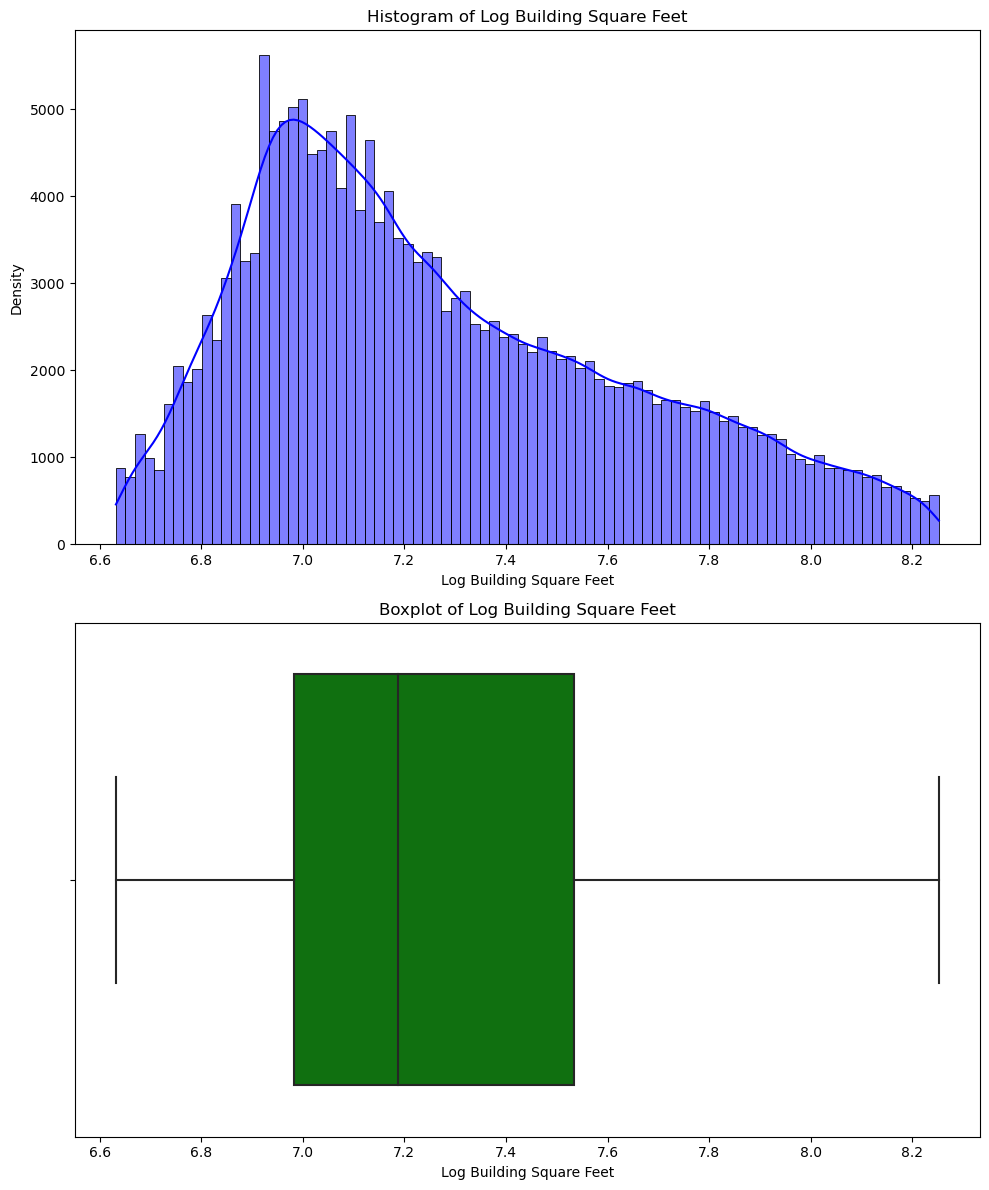

In [5]:
#create graph for log of building square feet to normalize the data 
def plot_filtered_log_data(data, column_name):
    # Ensure the column name is correct and check if it exists in the DataFrame
    if column_name in data.columns:
        log_column_name = 'Log ' + column_name
        data[log_column_name] = np.log(data[column_name][data[column_name] > 0])

        fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

        sns.histplot(data[log_column_name], kde=True, ax=axs[0], color='blue')
        axs[0].set_title('Histogram of ' + log_column_name)
        axs[0].set_xlabel(log_column_name)
        axs[0].set_ylabel('Density')

        sns.boxplot(x=data[log_column_name], ax=axs[1], color='green')
        axs[1].set_title('Boxplot of ' + log_column_name)

        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{column_name}' not found in the dataset.")
training_data = pd.read_csv("cook_county_train.csv", index_col='Unnamed: 0')

filtered_training_data = filter_extreme_values(training_data, 'Building Square Feet')

plot_filtered_log_data(filtered_training_data, 'Building Square Feet')

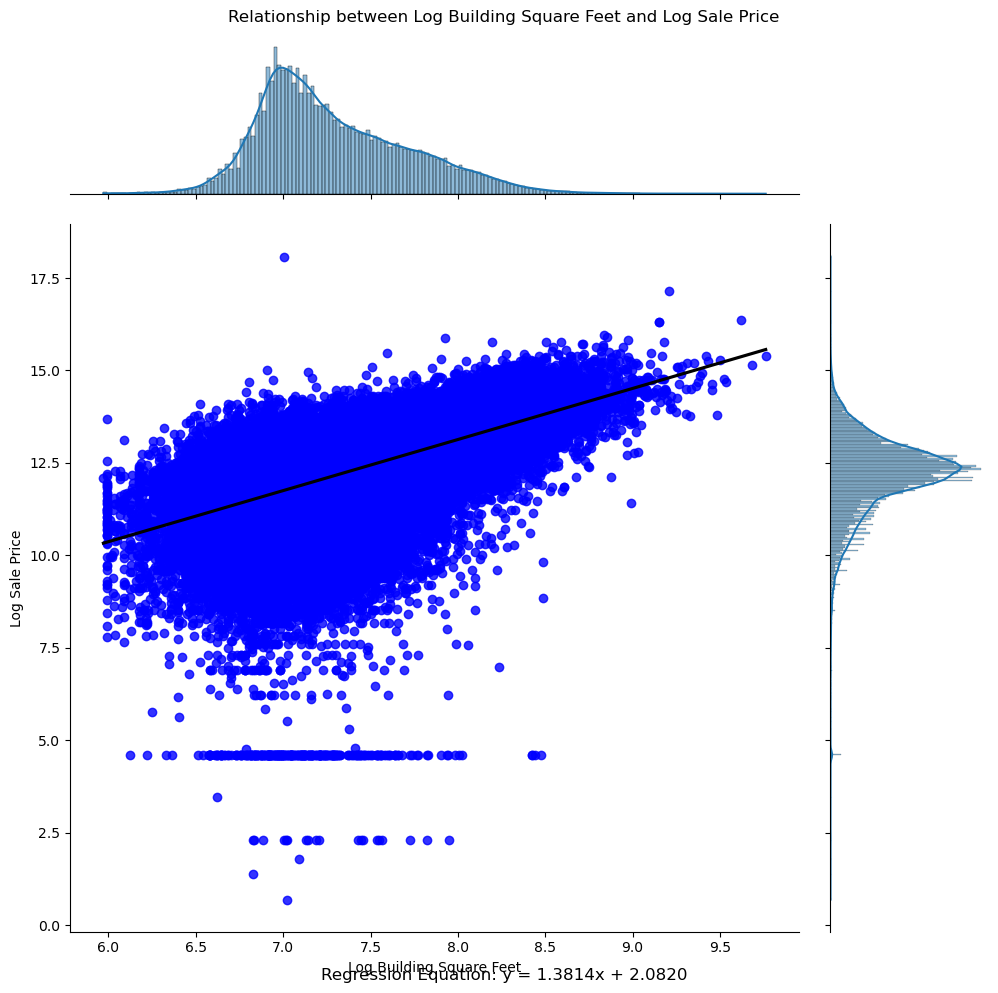

In [6]:
training_data = training_data[
    (training_data['Sale Price'] > 1) & 
    (training_data['Building Square Feet'] > 1)
]

# Apply log transformation
training_data['Log Sale Price'] = np.log(training_data['Sale Price'])
training_data['Log Building Square Feet'] = np.log(training_data['Building Square Feet'])

X = training_data['Log Building Square Feet']
X = sm.add_constant(X)  
model = sm.OLS(training_data['Log Sale Price'], X).fit()
predictions = model.predict(X)

slope, intercept = model.params['Log Building Square Feet'], model.params['const']

g = sns.jointplot(x='Log Building Square Feet', y='Log Sale Price', data=training_data,
                  kind='reg', height=10, ratio=4, space=0.2, scatter_kws={"color": "b"}, line_kws={"color": "black"})

g.set_axis_labels('Log Building Square Feet', 'Log Sale Price')
g.fig.suptitle('Relationship between Log Building Square Feet and Log Sale Price')
plt.figtext(0.5, 0.01, f'Regression Equation: y = {slope:.4f}x + {intercept:.4f}', ha="center", fontsize=12)
g.fig.subplots_adjust(top=0.95) 

plt.show()

In [7]:
#Creating a list of lists of size 2 where it is (Log Building Square Feet, Log Sale Price), used to grab random values and then use interpolation to predict data 
filtered_data = filter_extreme_values(training_data, 'Building Square Feet')
filtered_data = filter_extreme_values(filtered_data, 'Sale Price')

filtered_data['Log Building Square Feet'] = np.log(filtered_data['Building Square Feet'])
filtered_data['Log Sale Price'] = np.log(filtered_data['Sale Price'])

list_of_lists = filtered_data[['Log Building Square Feet', 'Log Sale Price']].values.tolist()


In [8]:
def prepare_segmented_interpolation(data, x_column, y_column, num_segments=5):

    grouped_data = training_data.groupby(x_column)[y_column].mean().reset_index()

    grouped_data = grouped_data.sort_values(by=x_column)

    min_x = grouped_data[x_column].min()
    max_x = grouped_data[x_column].max()
    segment_width = (max_x - min_x) / num_segments
    interpolation_functions = []

    for i in range(num_segments):
        segment_start = min_x + i * segment_width
        segment_end = min_x + (i + 1) * segment_width
        segment_data = grouped_data[(grouped_data[x_column] >= segment_start) & (grouped_data[x_column] <= segment_end)]

        if not segment_data.empty:
            x_vals = segment_data[x_column]
            y_vals = segment_data[y_column]

            interp_func = interp1d(x_vals, y_vals, kind='linear', fill_value='extrapolate')
            interpolation_functions.append((segment_start, segment_end, interp_func))

    return interpolation_functions

segmented_interpolations = prepare_segmented_interpolation(filtered_training_data, 'Log Building Square Feet', 'Log Sale Price', num_segments=5)

for start, end, func in segmented_interpolations:
    print(f"Segment from {start:.2f} to {end:.2f} prepared for interpolation.")


Segment from 5.97 to 6.73 prepared for interpolation.
Segment from 6.73 to 7.49 prepared for interpolation.
Segment from 7.49 to 8.25 prepared for interpolation.
Segment from 8.25 to 9.00 prepared for interpolation.
Segment from 9.00 to 9.76 prepared for interpolation.


In [9]:

# Choose a segment for demonstration, e.g., the third segment
segment_start, segment_end, interp_func = segmented_interpolations[2]  # Third segment

# Generate a random log of building square feet within the segment
x_random = random.uniform(segment_start, segment_end)

# interpolation using the random value
y_interpolated_log = interp_func(x_random)

# Convert back to the original sale price scale
y_interpolated_original = np.exp(y_interpolated_log)

print(f"For random log(building square feet) = {x_random:.2f}, interpolated log(sale price) = {y_interpolated_log:.2f}")
print(f"In original scale, sale price prediction for building square feet = {np.exp(x_random):.2f} is ${y_interpolated_original:.2f}")


For random log(building square feet) = 8.11, interpolated log(sale price) = 13.50
In original scale, sale price prediction for building square feet = 3333.66 is $732569.55


In [10]:
def predict_sale_price(building_sqft, segmented_interpolations):

    log_building_sqft = np.log(building_sqft)
    
    for segment_start, segment_end, interp_func in segmented_interpolations:
        if segment_start <= log_building_sqft <= segment_end:
            log_sale_price = interp_func(log_building_sqft)
            return np.exp(log_sale_price) 

    print("Building square feet is out of the range covered by the segments.")
    return None

building_sqft = 3500  
predicted_price = predict_sale_price(building_sqft, segmented_interpolations)
print(f"Predicted sale price for building square feet = {building_sqft} is ${predicted_price:.2f}")


Predicted sale price for building square feet = 3500 is $604887.34


In [11]:
def get_sale_prices_by_square_feet(data, square_feet, min_price):
    matched_data = data[(data['Building Square Feet'] > square_feet) & (data['Sale Price'] > min_price)]
    return matched_data['Sale Price'].values

filtered_training_data = filter_extreme_values(training_data, 'Building Square Feet')

# Example, only takes in values 760 or higher
sale_prices = get_sale_prices_by_square_feet(filtered_training_data, 4000, predicted_price)
print("Sale Prices for buildings with given square feet:", sale_prices)    

Sale Prices for buildings with 3000 square feet: []


In [12]:
#This code shows the error for our calculation. The error is very high since Cook County priced the houses at a much higher number than they were supposed to, proving our calculations are correct


def compare_estimated_to_actual(data, segmented_interpolations):
    random_row = data.sample(n=1).iloc[0]
    actual_building_sqft = random_row['Building Square Feet']
    actual_sale_price = random_row['Sale Price']

    
    estimated_sale_price = predict_sale_price(actual_building_sqft, segmented_interpolations)

    if estimated_sale_price is not None:
       
        error = actual_sale_price - estimated_sale_price
        percentage_error = (error / actual_sale_price) * 100
        
        print(f"Randomly Selected Building Square Feet: {actual_building_sqft}")
        print(f"Actual Sale Price: ${actual_sale_price:.2f}")
        print(f"Estimated Sale Price: ${estimated_sale_price:.2f}")
        print(f"Error: ${error:.2f}")
        print(f"Percentage Error: {percentage_error:.2f}%")
    else:
        print("Estimated sale price could not be calculated for the selected building square feet.")
compare_estimated_to_actual(training_data, segmented_interpolations)

Randomly Selected Building Square Feet: 1024.0
Actual Sale Price: $235000.00
Estimated Sale Price: $119826.48
Error: $115173.52
Percentage Error: 49.01%
